In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import numpy as np
from numpy.linalg import norm
from tqdm import tqdm, tqdm_notebook
import os
import time
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input

In [ ]:
relation=ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
def Feature_extraction(img_path,relation):
  input_shape= (224,224,3)
  img=image.load_img(img_path, target_size=(input_shape[0],input_shape[1]))
  img_array= image.img_to_array(img)
  img_array2 = np.expand_dims(img_array,axis=0)
  pre_img = preprocess_input(img_array2)
  feat = relation.predict(pre_img)
  features_flattened = feat.flatten()
  norm_feat = features_flattened / norm(features_flattened)
  return norm_feat

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
abbs = ['.jpg', '.JPG','.JPEG','.jpeg','.png','.PNG']
def ext_file_list(r_dir):
  list1 = []
  counter = 1
  for r,directories, f_names in os.walk(r_dir):
    for filename in f_names:
      if any(ext in filename for ext in abbs):
        list1.append(os.path.join(r,filename))
        counter +=1
  return list1
       

In [ ]:
r_dir = '/content/drive/MyDrive/train2017'
test_dir = '/content/drive/MyDrive/val2017'
f_names = sorted(ext_file_list(r_dir))
test_file = sorted(ext_file_list(test_dir))


In [8]:
f_l = []
for i in tqdm_notebook(range(len(f_names))):
  f_l.append(Feature_extraction(f_names[i], relation))
  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/64 [00:00<?, ?it/s]

1/1 [==============================] - 0s 205ms/step


In [9]:
t_f = []
for j in tqdm_notebook(range(len(test_file))):
  t_f.append(Feature_extraction(test_file[j], relation))
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/37 [00:00<?, ?it/s]

1/1 [==============================] - 0s 201ms/step


In [10]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

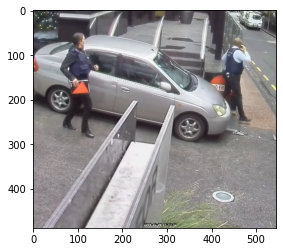

In [11]:
image_index=5
nei=NearestNeighbors(n_neighbors=10, algorithm='brute',
                     metric='euclidean').fit(f_l)
distances, indices = nei.kneighbors([t_f[image_index]])
plt.imshow(mpimg.imread(test_file[image_index]))

similar matches
[ 0 26 42 28 47 19 46 21 15 27]


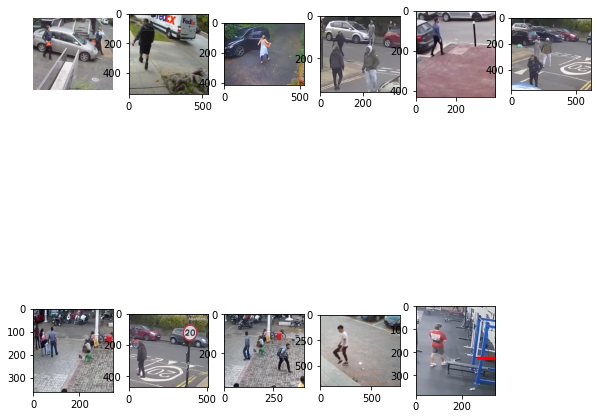

In [12]:
fig=plt.figure(figsize=(10,10))
r=2
c=6
fig.add_subplot(r,c,1)
plt.imshow(mpimg.imread(test_file[image_index]))
plt.axis('off')
print('similar matches')
indices=indices.flatten()
print(indices)

for i in range(len(indices)):
  fig.add_subplot(r,c,i+2)
  plt.imshow(mpimg.imread(f_names[indices[i]]))